In [33]:
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt


from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#traditional opt
from scipy.optimize import linprog

## Quantum Part
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt

#function set
%run Func_Set.ipynb

#Page Size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [34]:
def make_dictionary():
    Var_dictionary = {}
    # set-up a dictionary
    Total = 0
    # x input
    for e in range(2):
        Var_dictionary["x_%d"%(e)] = int(e)
    Total = len(Var_dictionary)   
    return Var_dictionary, Total

In [35]:
def show_graph(matrix):
    matfig = plt.figure(figsize=(9,9)) 
    plt.matshow(matrix,fignum=matfig.number)
    plt.colorbar()
    plt.show() 

In [36]:
def dot(*mats):
    A = mats[0]
    for B in mats[1:]:
        A = np.dot(A,B)    
    return A
        

In [37]:
def add_front(a,b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        
        c[:len(b)] += b  
    return c

In [38]:
def add_end(a,b):
    if len(a) < len(b):
        c = b.copy()
        c[-len(a):] += a
    else:
        c = a.copy()
        
        c[-len(b):] += b  
    return c

In [39]:
a = np.array([1,2,3,5])
b = np.array([2,1])
print(add_front(a,b))
print(add_end(a,b))

[3 3 3 5]
[1 2 5 6]


## Objective
$$
\max 8y_{1} + 9y_{1} + 5y_{3} + 6y_{4} -15x_{1} - 10x_{2} 
$$

$$
s.t. \quad y_{1} + y_{3} \leq 1
$$

$$
\qquad \  y_{1} + y_{4} \leq 1
$$

$$
\qquad \  y_{2} + y_{3} \leq 1
$$

$$
\qquad \  y_{2} + y_{4} \leq 1
$$

$$
\qquad \  x_{1} + x_{2} \geq 1
$$

$$
\qquad \  y_{1} - x_{1} \leq 0
$$

$$
\qquad \  y_{2} - x_{1} \leq 0
$$

$$
\qquad \  y_{3} - x_{2} \leq 0
$$

$$
\qquad \  y_{4} - x_{2} \leq 0
$$

$$
\qquad \ \forall \ j \quad y_{j} \geq 0
$$

## General Structure
$$
\max h^{\intercal} \cdot y + c^{\intercal} \cdot x
$$

$$
s.t. \quad A\mathbf{x} + G \mathbf{y} \leq b
$$

$$
x \in Binary
$$

$$
y \in R^{+} (bounded)
$$

## The Master problem

$$
\max_{x,t} \, c^{\intercal} x + t
$$

$$
s.t. \quad (b-Ax)^{\intercal}u^{k} \geq t \quad \forall k \in K
$$

$$
\qquad \ (b-Ax)^{\intercal}r^{j} \geq 0 \quad \forall j \in J
$$

$$
t \in \mathbb{R} \ , \  x\in X
$$


## The Rewritten Master problem

$$
\max_{x,t} \, c^{\intercal} x + t
$$

$$
s.t. \quad t +\left(u^{k}\right)^{\intercal}Ax \geq b^{\intercal}u^{k} \quad \forall k \in K
$$

$$
\qquad \ \left(r^{j}\right)^{\intercal}Ax \geq b^{\intercal}r^{j} \quad \forall j \in J
$$

$$
t \in \mathbb{R} \ , \  x\in X
$$

## Initial relaxed Master Problem
The first four constraints imply $y_{j} \leq 1$ for $j = 1, . . . , 4$, for any choice of $x$.
Thus, we can get a very simple bound for the problem: set $y_{j} = 1$ for $j = 1, . . . , 4$. This gives a value of $28$ from the $y$ variables.



In [40]:
A = np.array([[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [-1, -1],
              [-1, 0],
              [-1, 0],
              [0, -1],
              [0, -1],])

G = np.array([[1,0,1,0], 
              [1,0,0,1],
              [0,1,1,0],
              [0,1,0,1],
              [0,0,0,0],
              [1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1],
             ])
b = np.array([1,1,1,1,-1,0,0,0,0])

c = np.array([-15.0,-10.0])

h = np.array([8,9,5,6])

t = np.inf 

t_u = []
t_l = []

y_range = np.array([[0, 1],
                   [0, 1],
                   [0, 1],
                   [0, 1]])
length = len(c)



#### positive t
t_range_u = 11
t_range_l = -10 
t_x = np.arange(t_range_l , t_range_u , 1)


coef_t_x = np.power(2. , t_x)
#print(t_x, coef_t_x )

#### negative t 

negative_t_range_u = 5
negative_t_range_l = -10 
negative_t_x = np.arange(0 , t_range_u , 1)
negative_coef_t_x = - np.power(2. , negative_t_x)

#general_t_coeff = np.concatenate((coef_t_x, negative_coef_t_x))


#General_obj = np.concatenate((coef_t_x, negative_coef_t_x, c))


general_t_coeff = (coef_t_x)


General_obj = np.concatenate((coef_t_x, c))
                             
print(General_obj)
      
QUBO_obj = np.diag(-General_obj)


contraint_dict = {}

threshold = 0.001

answer_length = len(QUBO_obj)
len_of_t = len(general_t_coeff)



print("The length of variable is" , len(QUBO_obj))

[ 9.765625e-04  1.953125e-03  3.906250e-03  7.812500e-03  1.562500e-02
  3.125000e-02  6.250000e-02  1.250000e-01  2.500000e-01  5.000000e-01
  1.000000e+00  2.000000e+00  4.000000e+00  8.000000e+00  1.600000e+01
  3.200000e+01  6.400000e+01  1.280000e+02  2.560000e+02  5.120000e+02
  1.024000e+03 -1.500000e+01 -1.000000e+01]
The length of variable is 23


In [41]:
sign = np.tile(np.sign(h), (2, 1)).T
y_range_actual = sign * y_range 
t = dot (np.max(y_range_actual,axis = 1),h) 

t_u.append(t)

print(t)

28


In [42]:
ray_flag = 0

In [43]:
#cons_add_lhs = np.concatenate((coef_t_x,negative_coef_t_x, np.zeros_like(c)))
cons_add_lhs = np.concatenate((coef_t_x, np.zeros_like(c)))
cons_add_rhs = t

In [44]:
contraint_dict.update({0: [cons_add_lhs, "<=", cons_add_rhs, ray_flag]})
contraint_dict

{0: [array([9.765625e-04, 1.953125e-03, 3.906250e-03, 7.812500e-03,
         1.562500e-02, 3.125000e-02, 6.250000e-02, 1.250000e-01,
         2.500000e-01, 5.000000e-01, 1.000000e+00, 2.000000e+00,
         4.000000e+00, 8.000000e+00, 1.600000e+01, 3.200000e+01,
         6.400000e+01, 1.280000e+02, 2.560000e+02, 5.120000e+02,
         1.024000e+03, 0.000000e+00, 0.000000e+00]),
  '<=',
  28,
  0]}

In [45]:
#function set
%run Func_Set.ipynb

result = spot_search(QUBO_obj, contraint_dict, answer_length)


spot searching ......
yep enter
[9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00] <= 28
QUBO_Cons_ineq_normal
label >=  0 , penalty is 10240.0
symbol == <=
Slack_Var_Add_num: 5.0
Slack_Var_Add_coeff: [ 1.  2.  4.  8. 16.]
var_matched_1: [9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00]
var_matched_2: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  2.  4.  8. 16.]
normal 

In [46]:
#function set
%run Func_Set.ipynb
print(len(result),len(General_obj), len_of_t)
t, x, value = answer_analyse(result, General_obj, len_of_t, general_t_coeff)

obj = b-np.dot(A,x)

print("obj:",obj)

t_u.append(t)

23 23 21
obj: [ 1.  1.  1.  1. -1.  0.  0.  0.  0.]


In [47]:
lhs_ineq = -G.T
rhs_ineq = -h.T
bnd = [(0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),   
       (0, float("inf")),]  # Bounds of u s

print(lhs_ineq,rhs_ineq)


opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
print(opt)

[[-1 -1  0  0  0 -1  0  0  0]
 [ 0  0 -1 -1  0  0 -1  0  0]
 [-1  0 -1  0  0  0  0 -1  0]
 [ 0 -1  0 -1  0  0  0  0 -1]] [-8 -9 -5 -6]
     con: array([], dtype=float64)
     fun: -inf
 message: 'If feasible, the problem is (trivially) unbounded due  to a zero column in the constraint matrices. If you wish to check whether the problem is infeasible, turn presolve off.'
     nit: 0
   slack: array([nan, nan, nan, nan])
  status: 3
 success: False
       x: array([ 0.,  0.,  0.,  0., inf,  0.,  0.,  0.,  0.])


In [48]:
t_l.append(opt['fun'])

In [49]:
x_result = opt['x']
ray_flag = 1
if np.isinf(x_result).any():
    x_result = np.sign(opt['x'])
    ray_flag = 0

In [50]:
if ray_flag:
    cons_add_lhs = np.concatenate((general_t_coeff, dot(x_result,A)))
else:
    cons_add_lhs = np.concatenate((np.zeros_like(general_t_coeff), dot(x_result,A)))
cons_add_rhs = dot(b,x_result)
print(cons_add_lhs,"<=",cons_add_rhs)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -1. -1.] <= -1.0


In [51]:
contraint_dict.update({1: [cons_add_lhs, "<=", cons_add_rhs, ray_flag]})
contraint_dict

{0: [array([9.765625e-04, 1.953125e-03, 3.906250e-03, 7.812500e-03,
         1.562500e-02, 3.125000e-02, 6.250000e-02, 1.250000e-01,
         2.500000e-01, 5.000000e-01, 1.000000e+00, 2.000000e+00,
         4.000000e+00, 8.000000e+00, 1.600000e+01, 3.200000e+01,
         6.400000e+01, 1.280000e+02, 2.560000e+02, 5.120000e+02,
         1.024000e+03, 0.000000e+00, 0.000000e+00]),
  '<=',
  28,
  0],
 1: [array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.]),
  '<=',
  -1.0,
  0]}

In [52]:
#function set
%run Func_Set.ipynb

result = spot_search(QUBO_obj, contraint_dict, answer_length)

spot searching ......
yep enter
[9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00] <= 28
QUBO_Cons_ineq_normal
label >=  0 , penalty is 10240.0
symbol == <=
Slack_Var_Add_num: 5.0
Slack_Var_Add_coeff: [ 1.  2.  4.  8. 16.]
var_matched_1: [9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00]
var_matched_2: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  2.  4.  8. 16.]
normal 

In [53]:
#function set
%run Func_Set.ipynb
#print(len(result),len(General_obj), len_of_t)
t, x, value = answer_analyse(result, General_obj, len_of_t, general_t_coeff)
t_u.append(t)

obj = b-np.dot(A,x)

print("obj:",obj)
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
print(opt)
t_lower_bound = opt['fun']
print("t_upper_bound:",t)
print("t_lower_bound:",t_lower_bound)
t_l.append(opt['fun'])

obj: [1. 1. 1. 1. 0. 0. 0. 1. 1.]
     con: array([], dtype=float64)
     fun: 11.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([0., 0., 0., 0.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 8., 9., 5., 6.])
t_upper_bound: 28.0
t_lower_bound: 11.0


In [54]:
x_result = opt['x']
ray_flag = 1
if np.isinf(x_result).any():
    x_result = np.sign(opt['x'])
    ray_flag = 0
    
if ray_flag:
    cons_add_lhs = np.concatenate((general_t_coeff, dot(x_result,A)))
else:
    cons_add_lhs = np.concatenate((np.zeros_like(general_t_coeff), dot(x_result,A)))
cons_add_rhs = dot(b,x_result)
print(cons_add_lhs,"<=",cons_add_rhs)

contraint_dict.update({2: [cons_add_lhs, "<=", cons_add_rhs, ray_flag]})

[ 9.765625e-04  1.953125e-03  3.906250e-03  7.812500e-03  1.562500e-02
  3.125000e-02  6.250000e-02  1.250000e-01  2.500000e-01  5.000000e-01
  1.000000e+00  2.000000e+00  4.000000e+00  8.000000e+00  1.600000e+01
  3.200000e+01  6.400000e+01  1.280000e+02  2.560000e+02  5.120000e+02
  1.024000e+03 -1.700000e+01 -1.100000e+01] <= 0.0


In [55]:
#function set
%run Func_Set.ipynb

result = spot_search(QUBO_obj, contraint_dict, answer_length)

spot searching ......
yep enter
[9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00] <= 28
QUBO_Cons_ineq_normal
label >=  0 , penalty is 10240.0
symbol == <=
Slack_Var_Add_num: 5.0
Slack_Var_Add_coeff: [ 1.  2.  4.  8. 16.]
var_matched_1: [9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00]
var_matched_2: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  2.  4.  8. 16.]
normal 

In [56]:
#function set
%run Func_Set.ipynb
#print(len(result),len(General_obj), len_of_t)
t, x, value = answer_analyse(result, General_obj, len_of_t, general_t_coeff)

t_u.append(t)

obj = b-np.dot(A,x)


print("obj:",obj)
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
print(opt)
t_lower_bound = opt['fun']
print("t_upper_bound:",t)
print("t_lower_bound:",t_lower_bound)
t_l.append(opt['fun'])

obj: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     con: array([], dtype=float64)
     fun: 17.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0., 0., 0., 0.])
  status: 0
 success: True
       x: array([2., 6., 3., 0., 0., 0., 6., 0., 0.])
t_upper_bound: 28.0
t_lower_bound: 17.0


In [57]:
x_result = opt['x']
ray_flag = 1
if np.isinf(x_result).any():
    x_result = np.sign(opt['x'])
    ray_flag = 0
    
if ray_flag:
    cons_add_lhs = np.concatenate((general_t_coeff, dot(x_result,A)))
else:
    cons_add_lhs = np.concatenate((np.zeros_like(general_t_coeff), dot(x_result,A)))
cons_add_rhs = dot(b,x_result)
print(cons_add_lhs,"<=",cons_add_rhs)

contraint_dict.update({2: [cons_add_lhs, "<=", cons_add_rhs, ray_flag]})

[ 9.765625e-04  1.953125e-03  3.906250e-03  7.812500e-03  1.562500e-02
  3.125000e-02  6.250000e-02  1.250000e-01  2.500000e-01  5.000000e-01
  1.000000e+00  2.000000e+00  4.000000e+00  8.000000e+00  1.600000e+01
  3.200000e+01  6.400000e+01  1.280000e+02  2.560000e+02  5.120000e+02
  1.024000e+03 -6.000000e+00  0.000000e+00] <= 11.0


In [58]:
#function set
%run Func_Set.ipynb

result = spot_search(QUBO_obj, contraint_dict, answer_length)

spot searching ......
yep enter
[9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00] <= 28
QUBO_Cons_ineq_normal
label >=  0 , penalty is 10240.0
symbol == <=
Slack_Var_Add_num: 5.0
Slack_Var_Add_coeff: [ 1.  2.  4.  8. 16.]
var_matched_1: [9.765625e-04 1.953125e-03 3.906250e-03 7.812500e-03 1.562500e-02
 3.125000e-02 6.250000e-02 1.250000e-01 2.500000e-01 5.000000e-01
 1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00]
var_matched_2: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  2.  4.  8. 16.]
normal 

In [59]:
#function set
%run Func_Set.ipynb
#print(len(result),len(General_obj), len_of_t)
t, x, value = answer_analyse(result, General_obj, len_of_t, general_t_coeff)
t_u.append(t)


obj = b-np.dot(A,x)

print("obj:",obj)
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
print(opt)
t_lower_bound = opt['fun']
print("t_upper_bound:",t)
print("t_lower_bound:",t_lower_bound)
t_l.append(opt['fun'])

obj: [1. 1. 1. 1. 0. 1. 1. 0. 0.]
     con: array([], dtype=float64)
     fun: 17.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([0., 0., 0., 0.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 8., 9., 5., 6.])
t_upper_bound: 17.0
t_lower_bound: 17.0


In [60]:
t_u[1] =28.0
print(t_u)


[28, 28.0, 28.0, 28.0, 17.0]


In [61]:
t_l.insert(0, -np.inf)
print(t_l)

[-inf, -inf, 11.0, 17.0, 17.0]


([<matplotlib.axis.XTick at 0x1e1fb68a4c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

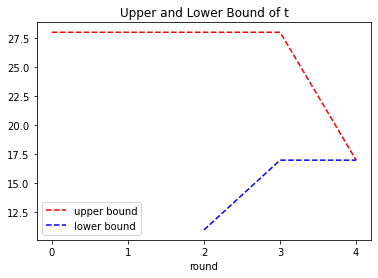

In [70]:
x_len = len(t_u)
x = np.arange(x_len)
plt.plot(x,t_u,'r--',label = "upper bound")
plt.plot(x,t_l,'b--',label = "lower bound")
plt.title('Upper and Lower Bound of t')
plt.xlabel('round')
plt.legend()
plt.show
plt.xticks(np.arange(0, x_len, step=1)) 

In [67]:
print(x)

[0 1 2 3 4]


In [391]:
#function set
%run Functions_Set.ipynb
# initial t
y_range_actual = sign * y_range 
t = dot (np.max(y_range_actual,axis = 1),h) 

print("the T upperbound is",t)


spot, co_domain = region_search(t, step, QUBO_obj, contraint_dict)


the T is 28
This is the 0 th region search, The search area is < [28. 20. 12.] >
Searching the domain partially done, Now do the checking
Looks Good returning the result now
Initial region is,< [28. 20. 12.] >


In [392]:
#function set
%run Functions_Set.ipynb
level = np.log2(step)
substep = 2**(level-1)
print("level", level,"substep",substep)    
    
sub_region ,value, opt_x_set =  region_check(region, substep, QUBO,contraint_dict)



level 3.0 substep 4.0
the searching area is < [28. 24. 20.] > , which is the 0 th in the subregion.
Searching the sub-domain partially done, Now do the checking
Looks Good, found the peak region going to dig into the sub region now
the searching area is < [28. 26. 24.] > , which is the 0 th in the subregion.
Searching the sub-domain partially done, Now do the checking
Looks Good, found the peak region going to dig into the sub region now
the searching area is < [28. 27. 26.] > , which is the 0 th in the subregion.
Searching the sub-domain partially done, Now do the checking
the step is 1, returning the peak region now
region is: [28. 27. 26.] codomain is: [28 27 26]


In [393]:
print(sub_region ,value,opt_x_set)

[28. 27. 26.] [28 27 26] [[0. 0.]
 [0. 0.]
 [0. 0.]]


In [394]:
t = sub_region[np.argmax(value)]
opt_x = opt_x_set[np.argmax(value),:]
print(t,opt_x)

28.0 [0. 0.]


In [395]:
# Select a solver
#sampler = LeapHybridSampler()

#sampleset = sampler.sample_qubo(QUBO)

#OP = sampleset.to_pandas_dataframe()
#OP_final = OP.to_numpy()[0]
#result = OP_final[:length]

x = opt_x
obj = b-np.dot(A,x)

print("obj:",obj)

obj: [ 1.  1.  1.  1. -1.  0.  0.  0.  0.]


In [396]:
lhs_ineq = -G.T
rhs_ineq = -h.T
bnd = [(0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),   
       (0, float("inf")),]  # Bounds of u s

print(lhs_ineq,rhs_ineq)


opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
print(opt)

[[-1 -1  0  0  0 -1  0  0  0]
 [ 0  0 -1 -1  0  0 -1  0  0]
 [-1  0 -1  0  0  0  0 -1  0]
 [ 0 -1  0 -1  0  0  0  0 -1]] [-8 -9 -5 -6]
     con: array([], dtype=float64)
     fun: -inf
 message: 'If feasible, the problem is (trivially) unbounded due  to a zero column in the constraint matrices. If you wish to check whether the problem is infeasible, turn presolve off.'
     nit: 0
   slack: array([nan, nan, nan, nan])
  status: 3
 success: False
       x: array([ 0.,  0.,  0.,  0., inf,  0.,  0.,  0.,  0.])


In [397]:
x_result = opt['x']
ray_flag = 1
if np.isinf(x_result).any():
    x_result = np.sign(opt['x'])
    ray_flag = 0

In [398]:
cons_add_lhs = dot(x_result,A)
cons_add_rhs = dot(b,x_result)
print(cons_add_lhs,"<=",cons_add_rhs)

[-1. -1.] <= -1.0


In [399]:
contraint_dict.update({0: [cons_add_lhs, "<=", cons_add_rhs, ray_flag]})
contraint_dict

{0: [array([-1., -1.]), '<=', -1.0, 0]}

In [400]:
%run Functions_Set.ipynb
step = 8.0 # => 2^n
region, co_domain, opt_x_set = region_search(t, step, QUBO_obj, contraint_dict)
print("Initial region is,<",region,">")

This is the 0 th region search, The search area is < [28. 20. 12.] >
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
Searching the domain partially done, Now do the checking
Looks Good returning the result now
Initial region is,< [28. 20. 12.] >


In [401]:
#function set
%run Functions_Set.ipynb
level = np.log2(step)
substep = 2**(level-1)
print("level", level,"substep",substep)    
    
sub_region ,value, opt_x_set =  region_check(region, substep, QUBO,contraint_dict)

level 3.0 substep 4.0
the searching area is < [28. 24. 20.] > , which is the 0 th in the subregion.
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
Searching the sub-domain partially done, Now do the checking
Looks Good, found the peak region going to dig into the sub region now
the searching area is < [28. 26. 24.] > , which is the 0 th in the subregion.
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >

In [402]:
t = sub_region[np.argmax(value)]
opt_x = opt_x_set[np.argmax(value),:]
print(t,opt_x)


x = opt_x
obj = b-np.dot(A,x)

print("obj:",obj)

28.0 [0. 1.]
obj: [1. 1. 1. 1. 0. 0. 0. 1. 1.]


In [403]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
print(opt)

     con: array([], dtype=float64)
     fun: 11.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([0., 0., 0., 0.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 8., 9., 5., 6.])


In [404]:
x_result = opt['x']
ray_flag = 1
if np.isinf(x_result).any():
    x_result = np.sign(opt['x'])
    ray_flag = 0

In [405]:
cons_add_lhs = dot(x_result,A)
cons_add_rhs = dot(b,x_result)
print(cons_add_lhs,"<=",cons_add_rhs)

[-17. -11.] <= 0.0


In [406]:
contraint_dict.update({1: [cons_add_lhs, "<=", cons_add_rhs, ray_flag]})
contraint_dict

{0: [array([-1., -1.]), '<=', -1.0, 0], 1: [array([-17., -11.]), '<=', 0.0, 1]}

In [407]:
%run Functions_Set.ipynb
step = 8.0 # => 2^n
region, co_domain, opt_x_set = region_search(t, step, QUBO_obj, contraint_dict)
print("Initial region is,<",region,">")

This is the 0 th region search, The search area is < [28. 20. 12.] >
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 1 th constraint: [-17. -11.] <= -28.0 flag is 1
input constraint: 1 th constraint: [17. 11.] >= 28.0
yep enter
[17. 11.] >= 28.0
QUBO_Cons_ineq_normal
label >=  0 , penalty is 150.0
symbol == >=
Slack_Var_Add_num: 0
Slack_Var_Add_coeff: []
normal else
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 1 th constraint: [-17. -11.] <= -20.0 flag is 1
input constraint: 1 th constraint: [17. 11.] >= 20.0
yep enter
[17. 11.] >= 20.0
QUBO_Cons_ineq_normal
label >=  0 , penalty is 150.0
symbol == >=
Slack_Var_Add_num: 4.0
Slack_Var_Add_coeff: [1. 2. 4. 8.]
var_matched_2: [0.

In [408]:
#function set
%run Functions_Set.ipynb
level = np.log2(step)
substep = 2**(level-1)
print("level", level,"substep",substep)    
    
sub_region ,value, opt_x_set =  region_check(region, substep, QUBO,contraint_dict)

level 3.0 substep 4.0
the searching area is < [20. 16. 12.] > , which is the 0 th in the subregion.
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 1 th constraint: [-17. -11.] <= -20.0 flag is 1
input constraint: 1 th constraint: [17. 11.] >= 20.0
yep enter
[17. 11.] >= 20.0
QUBO_Cons_ineq_normal
label >=  0 , penalty is 150.0
symbol == >=
Slack_Var_Add_num: 4.0
Slack_Var_Add_coeff: [1. 2. 4. 8.]
var_matched_2: [0. 0. 1. 2. 4. 8.]
normal else
input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
input constraint: 1 th constraint: [-17. -11.] <= -16.0 flag is 1
input constraint: 1 th constraint: [17. 11.] >= 16.0
yep enter
[17. 11.] >= 16.0
QUBO_Cons_ineq_normal
label >=  0 , penalty is 150.0
symbol == 

In [409]:
t = sub_region[np.argmax(value)]
opt_x = opt_x_set[np.argmax(value),:]
print(t,opt_x)

print("optimal value:", value[np.argmax(value)])

x = opt_x
obj = b-np.dot(A,x)

print("obj:",obj)

17.0 [1. 0.]
optimal value: 2
obj: [1. 1. 1. 1. 0. 1. 1. 0. 0.]


In [410]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
print(opt)

     con: array([], dtype=float64)
     fun: 17.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([0., 0., 0., 0.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 8., 9., 5., 6.])


In [329]:
%run Functions_Set.ipynb
QUBO_post, _ = solve_master_qubo(C, t, QUBO, contraint_dict, _print = 1)
print(QUBO_post)

input constraint: 0 th constraint: [-1. -1.] <= -1.0 flag is 0
input constraint: 0 th constraint: [1. 1.] >= 1.0
yep enter
[1. 1.] >= 1.0
label =>  0 , penalty is 150.0
fx >=1 condition
[[-135.  150.]
 [   0. -140.]]


In [166]:
# Obj
QUBO_obj = QUBO.obj() 

# add constraint (r1)^{T} Ax ≤ b^{T} r1 to (RMP):

Penalty = np.max(np.abs(c))*10

#QUBO += Penalty * np.asarray(0.5 * (np.outer(cons_add_lhs_final,cons_add_lhs_final) - 3.0 * np.diag(cons_add_lhs_final)))



new_Constraint = cons_add_lhs_final
new_Symbol = symbol
New_rhs = cons_add_rhs_final
round_num = 2 








[[-135.  150.]
 [   0. -140.]]


In [ ]:

print(QUBO)
t = 0
C = c
print(C, t, new_Constraint, new_Symbol, New_rhs, round_num)

QUBO, _ = solve_master_old(C, t, QUBO_pre, new_Constraint, new_Symbol, New_rhs, round_num, Penalty, _print = 1)

In [ ]:

initial_spot = np.array([t, t - step, t - 2 * step])
value = np.arange(len(initial_spot))

for index, t_assume in enumerate(initial_spot):
    
    # OBJ
      
    x = solve_for_value(QUBO)
    
    #final result
    value[index] = dot(c,x) + t_assume

if value[2] < value[1]:
    
    #下一步
    
    #return initial_spots , value
    print("next")
    
else:
    
    print("continue")